# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

The equatorial regions received more sunlight because of the curvature of the earth,
The southern hemisphere has less land than the northern the temperature drops because of the ocean,
The latitudes are almost the same in both of them

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import api_key 
#from starter_code import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city in the list.
for index, city in enumerate(cities, start = 1):
    try:          
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 100:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
City not found. Skipping
City not found. Skipping
Processing Record 1 of Set 1 : hilo
Processing Record 2 of Set 1 : port alfred
Processing Record 3 of Set 1 : hamilton
City not found. Skipping
Processing Record 4 of Set 1 : mahebourg
Processing Record 5 of Set 1 : sancti spiritus
City not found. Skipping
City not found. Skipping
Processing Record 6 of Set 1 : hobart
Processing Record 7 of Set 1 : faanui
Processing Record 8 of Set 1 : kaitangata
Processing Record 9 of Set 1 : busselton
Processing Record 10 of Set 1 : unity
Processing Record 11 of Set 1 : mount gambier
Processing Record 12 of Set 1 : avarua
Processing Record 13 of Set 1 : new norfolk
Processing Record 14 of Set 1 : mareeba
Processing Record 15 of Set 1 : rikitea
Processing Record 16 of Set 1 : bethel
Processing Record 17 of Set 1 : soyo
Processing Record 18 of Set 1 : upernavik
Processing Record 19 of Set 1 : fare
Processing Record 20 of Set 1 : dudinka
Processing 

City not found. Skipping
Processing Record 85 of Set 2 : sabang
Processing Record 86 of Set 2 : zaykovo
Processing Record 87 of Set 2 : manzil kamil
Processing Record 88 of Set 2 : dongtai
Processing Record 89 of Set 2 : robertsport
Processing Record 90 of Set 2 : teya
Processing Record 91 of Set 2 : esperance
Processing Record 92 of Set 2 : mackay
Processing Record 93 of Set 2 : tuktoyaktuk
Processing Record 94 of Set 2 : kerema
Processing Record 95 of Set 2 : shingu
Processing Record 96 of Set 2 : burgos
Processing Record 97 of Set 2 : klaksvik
Processing Record 98 of Set 2 : bredasdorp
Processing Record 99 of Set 2 : atambua
Processing Record 100 of Set 2 : rawson
Processing Record 101 of Set 2 : paita
Processing Record 0 of Set 3 : east wenatchee
Processing Record 1 of Set 3 : muros
Processing Record 2 of Set 3 : casper
Processing Record 3 of Set 3 : cidreira
Processing Record 4 of Set 3 : pangnirtung
Processing Record 5 of Set 3 : shihezi
Processing Record 6 of Set 3 : huicungo
Pr

Processing Record 76 of Set 4 : pokhara
Processing Record 77 of Set 4 : la foa
Processing Record 78 of Set 4 : mayor pablo lagerenza
Processing Record 79 of Set 4 : guadalupe
Processing Record 80 of Set 4 : zavetnoye
Processing Record 81 of Set 4 : taber
Processing Record 82 of Set 4 : kunmadaras
Processing Record 83 of Set 4 : bilma
Processing Record 84 of Set 4 : concordia
Processing Record 85 of Set 4 : santa isabel do rio negro
Processing Record 86 of Set 4 : harper
Processing Record 87 of Set 4 : kamskoye ustye
Processing Record 88 of Set 4 : airai
Processing Record 89 of Set 4 : fortuna
Processing Record 90 of Set 4 : coquimbo
Processing Record 91 of Set 4 : yenagoa
Processing Record 92 of Set 4 : chumikan
Processing Record 93 of Set 4 : pacific grove
Processing Record 94 of Set 4 : marfino
Processing Record 95 of Set 4 : port elizabeth
Processing Record 96 of Set 4 : cayenne
Processing Record 97 of Set 4 : bure
Processing Record 98 of Set 4 : ilulissat
Processing Record 99 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame 
weather_df = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [7]:
# Display the Data Frame
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,40,US,1603671619,55,19.73,-155.09,87.80,11.41
1,Port Alfred,91,ZA,1603672031,88,-33.59,26.89,63.68,6.04
2,Hamilton,90,US,1603672318,62,39.18,-84.53,53.60,6.93
3,Mahébourg,75,MU,1603672039,78,-20.41,57.70,73.40,14.99
4,Sancti Spíritus,100,CU,1603672319,96,21.93,-79.44,74.71,10.27
...,...,...,...,...,...,...,...,...,...
551,Nkhotakota,24,MW,1603672487,70,-12.93,34.30,74.57,4.29
552,Peçanha,100,BR,1603672488,100,-18.55,-42.56,64.06,2.66
553,Nabire,100,ID,1603672395,62,-3.37,135.48,86.92,1.72
554,Ranau,40,MY,1603672488,100,5.95,116.66,73.40,5.82


In [8]:
# Export the city data into a .csv.
weather_df.to_csv("cities.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

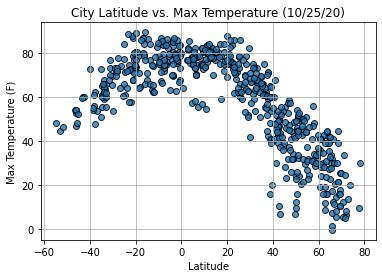

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig1.png")

plt.show()


#### Latitude vs. Humidity Plot

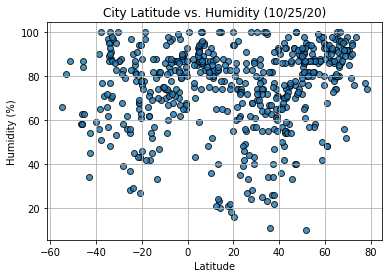

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig2.png")

plt.show()


#### Latitude vs. Cloudiness Plot

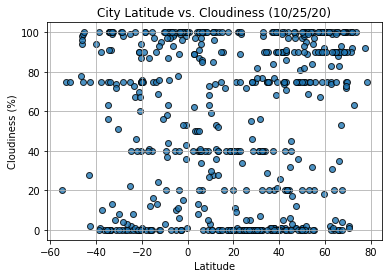

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig3.png")

plt.show()


#### Latitude vs. Wind Speed Plot

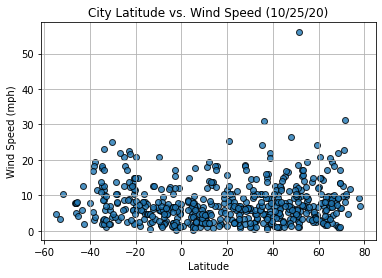

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("figures/fig4.png")

plt.show()


## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotting(data_frame,x_axis,y_axis,title_plot,y_label,x_label,eq_x,eq_y,pic_name):
    data_frame.plot(kind="scatter", x=x_axis, y=y_axis, grid=False, figsize=(7,5),title=title_plot)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data_frame[x_axis], data_frame[y_axis])
    regress_values = data_frame[x_axis] * slope + intercept
    #Line equation 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plotting the line
    plt.plot(data_frame[x_axis],regress_values,"r-")
    #Plotting the line equation
    plt.annotate(line_eq,(eq_x,eq_y),fontsize=15,color="red")
    plt.savefig(pic_name)
    print(f"rvalue is : {rvalue}")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
Northern_df = weather_df.loc[weather_df["Lat"] >= 0]
Southern_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue is : -0.8686243381224011


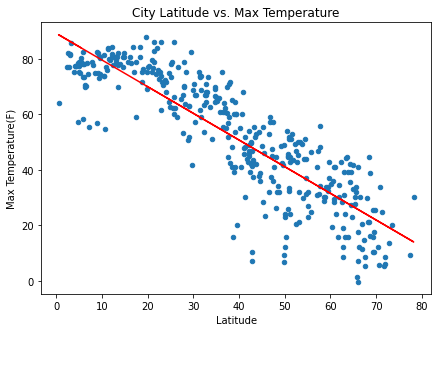

<Figure size 432x288 with 0 Axes>

In [15]:
plotting(Northern_df,'Lat','Max Temp',"City Latitude vs. Max Temperature","Max Temperature(F)","Latitude",10,-30,"output_data/Northern_City_Lat_Temp")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue is : 0.7047035061489468


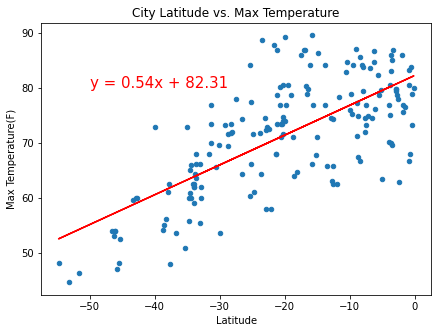

<Figure size 432x288 with 0 Axes>

In [16]:
plotting(Southern_df,'Lat','Max Temp',"City Latitude vs. Max Temperature","Max Temperature(F)","Latitude",-50,80,"output_data/Southern_City_Lat_Temp")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue is : 0.1864343217090398


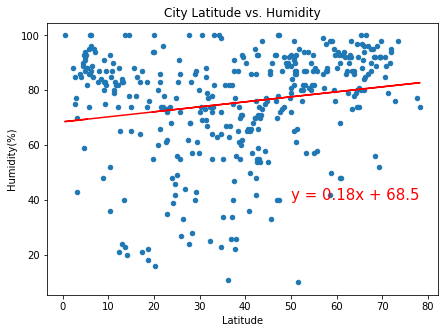

<Figure size 432x288 with 0 Axes>

In [17]:
plotting(Northern_df,'Lat','Humidity',"City Latitude vs. Humidity","Humidity(%)","Latitude",50,40,"output_data/Northern_City_Lat_Humidity")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue is : 0.1401453943147153


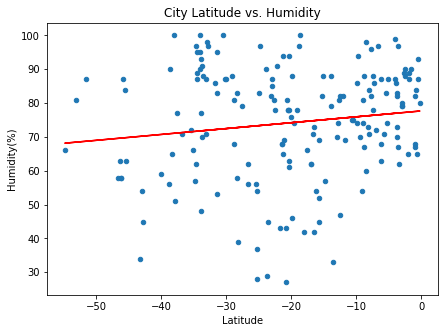

<Figure size 432x288 with 0 Axes>

In [18]:
plotting(Southern_df,'Lat','Humidity',"City Latitude vs. Humidity","Humidity(%)","Latitude",-20,20,"output_data/Southern_City_Lat_Humidity")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue is : 0.22434899801434843


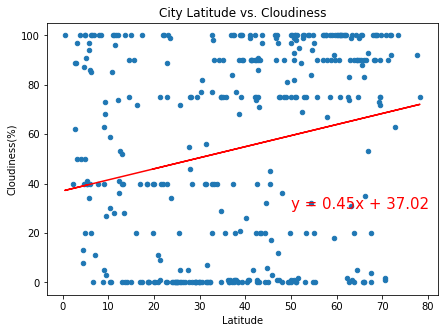

<Figure size 432x288 with 0 Axes>

In [19]:
plotting(Northern_df,'Lat','Cloudiness',"City Latitude vs. Cloudiness","Cloudiness(%)","Latitude",50,30,"output_data/Northern_City_Lat_Coludiness")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue is : 0.05516464997160108


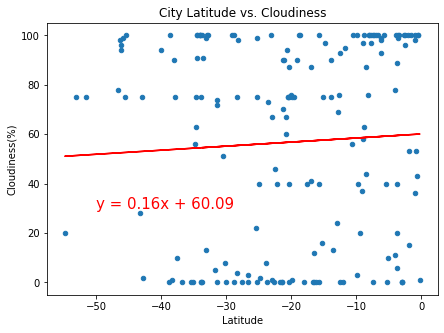

<Figure size 432x288 with 0 Axes>

In [20]:
plotting(Southern_df,'Lat','Cloudiness',"City Latitude vs. Cloudiness","Cloudiness(%)","Latitude",-50,30,"output_data/Southern_City_Lat_Cloudiness")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue is : 0.1684902130258326


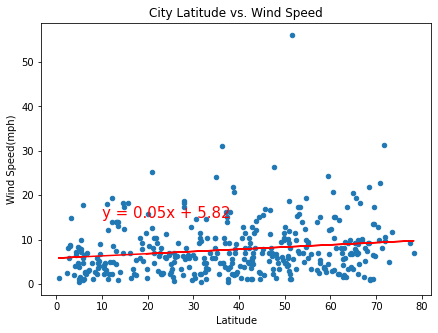

<Figure size 432x288 with 0 Axes>

In [21]:
plotting(Northern_df,'Lat','Wind Speed',"City Latitude vs. Wind Speed","Wind Speed(mph)","Latitude",10,15,"output_data/Northern_City_Lat_Wind_Speed")
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue is : -0.2222967201378825


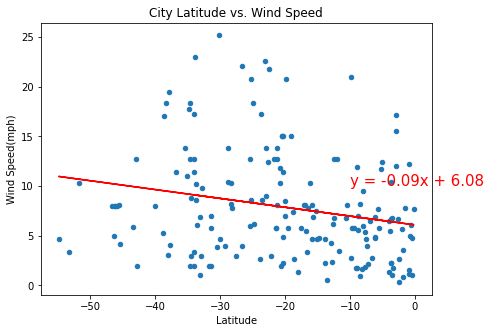

<Figure size 432x288 with 0 Axes>

In [22]:
plotting(Southern_df,'Lat','Wind Speed',"City Latitude vs. Wind Speed","Wind Speed(mph)","Latitude",-10,10,"output_data/Southern_City_Lat_Wind_Speed")
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")